<a href="https://colab.research.google.com/github/ImAbhishekTomar/Python-Programs/blob/master/Live%20Stock%20Price%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Live Stock Price Prediction
Data Source
IDEA (IDEA.NS)**

https://query1.finance.yahoo.com/v7/finance/download/IDEA.NS?period1=1173398400&period2=1595635200&interval=1d&events=history

**Asian Oilfield Services Limited (ASIANOI.BO)**

https://query1.finance.yahoo.com/v7/finance/download/ASIANOI.BO?period1=946944000&period2=1595635200&interval=1d&events=history

In [11]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
#from sklearn.externals import joblib

frequency='1d' #Daily:1d | weekly:1wk | monthly:1mo
DATA_SOURCE_URL=f'https://query1.finance.yahoo.com/v7/finance/download/ASIANOI.BO?period1=946944000&period2=1595635200&interval=1mo&events=history'


# **Get Live Stock Data** 🌎

In [12]:
# Get Live Stock Data
df=pd.read_csv(DATA_SOURCE_URL,
               usecols=['Date','Open','High','Low','Close'],
               nrows=None,
               skip_blank_lines=True,
               dtype={'Date':str,'Open':str,'High':float,'Low':float,'Close':float})
df


,Date,Open,High,Low,Close
0,2000-01-01,3.300000,4.350000,1.800000,2.00
1,2000-02-01,2.350000,2.750000,2.050000,2.30
2,2000-03-01,2.300000,2.300000,2.000000,2.10
3,2000-04-01,2.100000,2.100000,2.100000,2.10
4,2000-05-01,2.100000,2.100000,2.100000,2.10
...,...,...,...,...,...
242,2020-03-01,123.000000,123.000000,63.799999,69.00
243,2020-04-01,69.000000,84.400002,67.000000,73.25
244,2020-05-01,71.000000,77.000000,65.000000,72.00
245,2020-06-01,75.599998,106.000000,75.599998,89.75


# **Data Cleanup - Remove empty row and replace date "-" with space 💁**

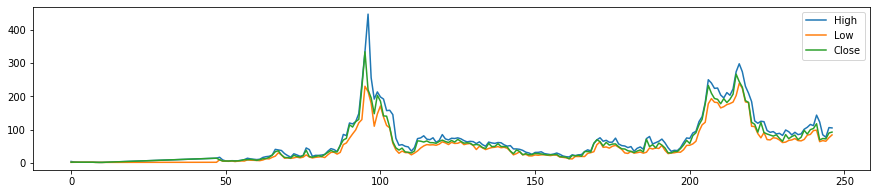

In [5]:

df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)

dataset=[]
for index, row in df.iterrows():
    if any(row):
        if(len(row['Date'])>0):
            if(row['Open']!='null'):
                row['Date']=row['Date'].replace("-","")
                dataset.append(row)
            else:
                print('issue found')
                print(row)

                
df=pd.DataFrame(dataset)
df.plot(kind='line',figsize=(15,3))
#print(df)


# **Output Data Set (High,Low,Close) ↘️**

In [6]:
OutputDataSet=df.drop(columns=['Date','Open']) # print(InputDataSet)
OutputDataSet


,High,Low,Close
0,4.350000,1.800000,2.00
1,2.750000,2.050000,2.30
2,2.300000,2.000000,2.10
3,2.100000,2.100000,2.10
4,2.100000,2.100000,2.10
...,...,...,...
242,123.000000,63.799999,69.00
243,84.400002,67.000000,73.25
244,77.000000,65.000000,72.00
245,106.000000,75.599998,89.75


# **Input Data Set (Date(yyyymmdd),Open) 🔠**

In [7]:
InputDataSet=df.drop(columns=['High','Low','Close'])
InputDataSet

,Date,Open
0,20000101,3.300000
1,20000201,2.350000
2,20000301,2.300000
3,20000401,2.100000
4,20000501,2.100000
...,...,...
242,20200301,123.000000
243,20200401,69.000000
244,20200501,71.000000
245,20200601,75.599998


# **Get & Format Today date and set in input 🗓️**

In [8]:
#Get Today Date
today=datetime.now()
year=today.strftime('%Y')
month=today.strftime('%m')
day=today.strftime('%d')
datevalue=f'{year}{month}{day}' 

# Type your input - Date(MMddyy)|OpenPrice(float)
INPUT_DATE=datevalue 
INPUT_OPEN_PRICE=8.40


# **Actual Machine Learning Code Using Decision Tree Classifier 🤖**

In [9]:
model=DecisionTreeClassifier()
model.fit(InputDataSet,OutputDataSet.astype('int')) #.astype('int')
prediction=model.predict([ [INPUT_DATE,INPUT_OPEN_PRICE] ]) #Output -> High | Low | Close
prediction

array([[24, 11, 22]])

# **Train Model**

In [ ]:
#joblib.dump(prediction,'stock-prediction.joblib')
#model=joblib.load(prediction,'stock-prediction.joblib')



# **Output & Data plot 📉**



Today (2020/09/09) Stock Prediction is :
-------------------------
High  : 24
Low   : 11
Close : 22
-------------------------


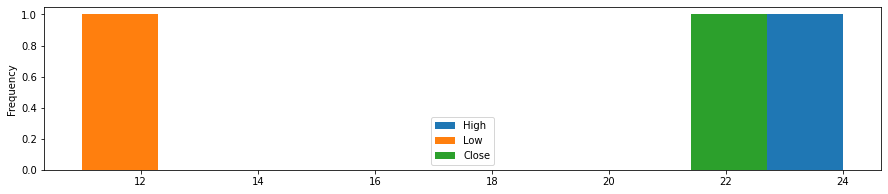

In [10]:

dfp=pd.DataFrame(prediction)
dfp=dfp.rename(columns={0: 'High',1:'Low',2:'Close'})

print('\n')

print(f'Today ({year}/{month}/{day}) Stock Prediction is :')
print('-------------------------')
print(f'High  : {prediction[0][0]}')
print(f'Low   : {prediction[0][1]}')
print(f'Close : {prediction[0][2]}')
print('-------------------------')

dfp.plot(kind='hist',figsize=(15,3))